# Analysing Heart Rate Data Using Principal Component Analysis

## Data & Project Goals

Hospital mortality data is used for this project and can be found on [Kaggle](https://www.kaggle.com/saurabhshahane/in-hospital-mortality-prediction).

These are the goals for this project:

- Prepare the data for PCA (removing blanks, standardising)
- Apply the PCA algorithm (using the sklearn library)
- Determine the optimal number of principal components to use

## Import Packages

In [31]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_palette("Dark2")

## Import Data

In [124]:
# Import data
pca_raw_df = pd.read_csv("data/mortality.csv")
len(pca_raw_df.columns.values)

51

## Prepare the Data

In [68]:
# Remove rows that contain blank values
pca_nona_df = pca_raw_df.dropna()

In [106]:
# Select only numeric columns
# We calculate the max of each column and assume that any column with a max of 1 is probably not numeric
max_all = pca_nona_df.max()
max_cols = list(max_all[max_all != 1].index)

pca_sub_df = pca_nona_df[max_cols]

# Some additional columns need to be dropped that did not fit into our initial logic
pca_sub2_df = pca_sub_df.drop(columns = ['group', 'ID', 'gendera'])


The data must be standardised before applying PCA. 

In [105]:
# Standardise the variables
scaler = StandardScaler()
pca_std = scaler.fit_transform(pca_sub2_df)

## Applying Principal Component Analysis

Now that our data is ready, we can apply PCA

In [104]:
# Fit PCA
pca = PCA()
fit_pca = pca.fit_transform(pca_std)

# Create a dataframe containing the principal component values for each row
pca_fit_df = pd.DataFrame(data = fit_pca)

### Plotting Cumulative Variance

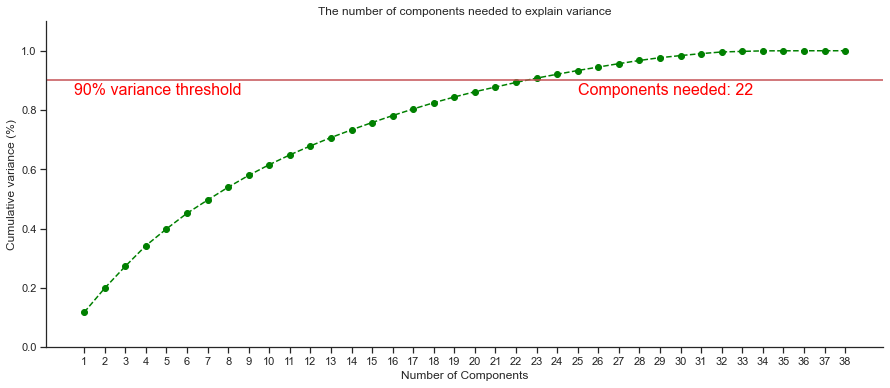

In [109]:
# Plot the cumulative variance for each component
plt.figure(figsize = (15, 6))
components = np.arange(1, 39, step=1)
variance = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(components, variance, marker='o', linestyle='--', color='green')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 39, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% variance threshold', color = 'red', fontsize=16)
plt.text(25, 0.85, "Components needed: "+str(np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9)[0][0]), color = "red", fontsize=16)

plt.show()

Using a variance threshold of 90%, we can use the above chart to figure out how many components we should retain from our dataset in order for it to still make sense for us in any further modelling.

Note that we chose 90% here as the variance threshold but this is not a golden rule here. The desired variance explained by the principal components is chosen at the researcher's or data scientist's discretion.

We can see that we need 22 components in order to retain 90% of the variability (information) in our data. That's not much of an improvement over the total number of variables, 38. 

### Scree Plot

A scree plot is one of the most common ways to determine the number of components to retain. It plots the components on the x axis and the eginvalues on the y axis.

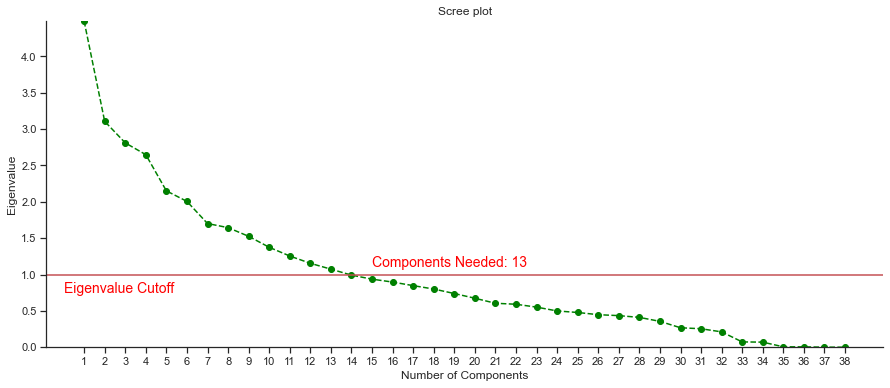

In [123]:
# Scree plot
plt.figure(figsize=(15, 6))
components = np.arange(1, 39, step=1)
eigenvalues = pca.explained_variance_

plt.plot(components, eigenvalues, marker = 'o', linestyle = '--', color = 'green')
plt.ylim(0, max(eigenvalues))

plt.ylabel('Eigenvalue')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 39, step = 1))
plt.title('Scree plot')

plt.axhline(y=1, color = 'r', linestyle = '-')
plt.text(0, 0.75, 'Eigenvalue Cutoff', color = 'red', fontsize=14)
plt.text(15, 1.10, 'Components Needed: ' +str(np.where(eigenvalues<=1)[0][0]), color = 'red', fontsize=14)

plt.show()

As a general rule of thumb, we select the number of components that have an eigenvalue greater than 1. From the above scree plot we see that 13 components should be retained. This is very different to the previous cumulative variance plot where we chose to retain 22 components.

At 13 components, around 65% of the variability is explained. This is much lower than the variability captured when retaining 22 components (90%). At this point, the researcher or data scientist would need to decide whether a cumulative variance of 65% is satisfactory based on their domain knowledge and other research in the area. 

Alternatively, different methods of determining the components could be used or it could be decided that PCA just isn't a suitable method for this dataset and other dimensionality reduction techniques could be explored.